<a href="https://colab.research.google.com/github/meheroob/heart-disease-detection/blob/main/Heart_disease_decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly
import plotly.express as px

import seaborn as sns

import cufflinks as cf

Importing the data from local drive to Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_dataset.csv to heart_disease_dataset (4).csv


Converting the csv into dataframe

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart_disease_dataset.csv']))

# DATA ANALYSIS

Visualizing the dataframe

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


The dataset attributes are listed as below: 13 attributes +1 target
1.	age: The person's age in years
2.	sex: The person's sex (1 = male, 0 = female)
3.	cp: Chest pain in 4 values (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)
4.	trestbps: Resting blood pressure 
5.	chol: Cholesterol measurement in mg/dl
6.	fbs: Fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7.	restecg: Resting electrocardiographic measurement (0 = normal, 1 = ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8.	thalach: Maximum heart rate achieved
9.	exang: Exercise induced angina (1 = yes; 0 = no)
10.	oldpeak: ST depression induced by exercise relative to rest
11.	slope: The slope of the peak exercise ST segment (0: upsloping, 1: flat, 2:downsloping)
12.	ca: The number of major vessels (0-3)
13.	thal: A blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect, 0 could be missing/error data)
14.	target label: Heart disease (0 = no, 1 = yes)


In [ ]:
df['target']


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [ ]:
df.shape

(303, 14)

In [ ]:
df.size

4242

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking if there is any null value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Graph and all types of pictorial visualization

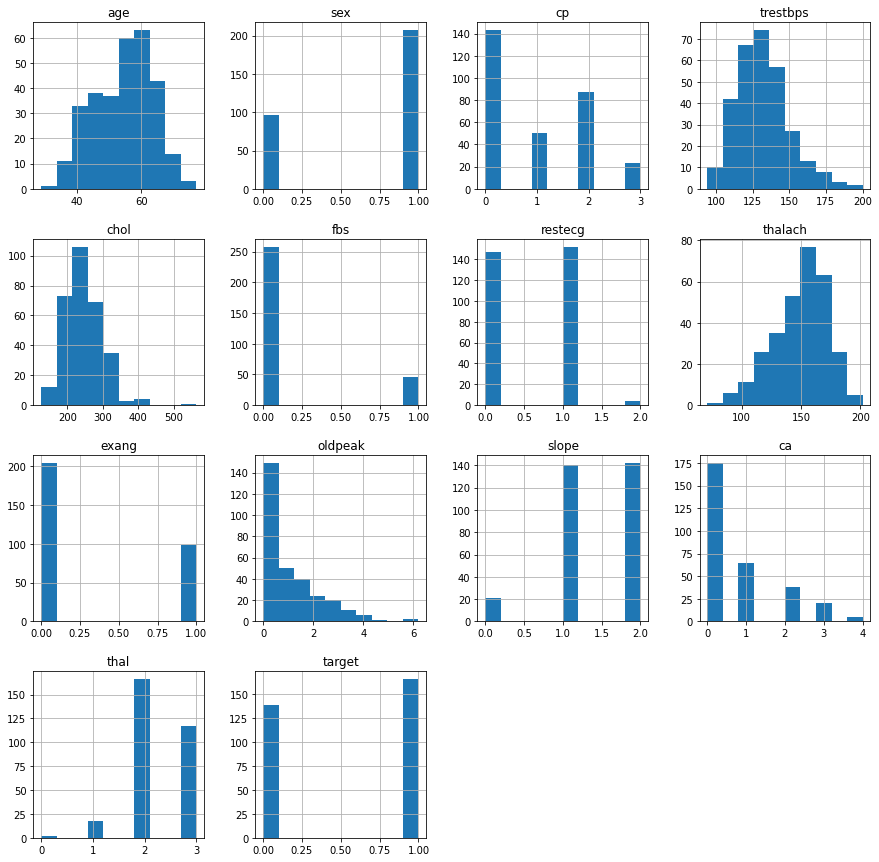

In [ ]:
df.hist(figsize=(15,15))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



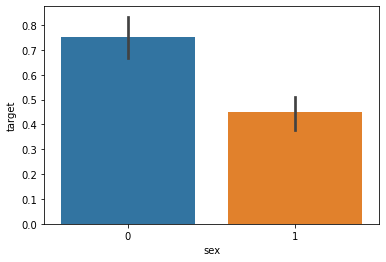

In [ ]:
sns.barplot(df['sex'], df['target'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



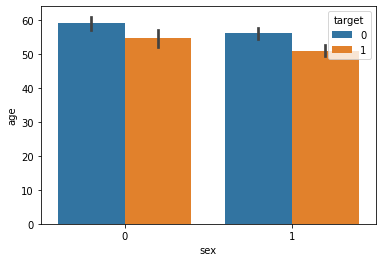

In [ ]:
sns.barplot(df['sex'], df['age'], hue=df['target'])
plt.show()

We create a heat map for attributes with numerical values.

In [ ]:
n_col = ['age', 'trestbps',	'chol', 'oldpeak', 'thalach']

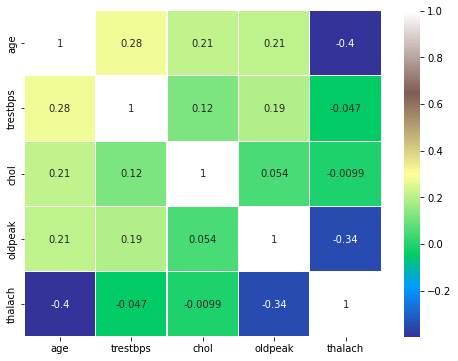

In [ ]:
sns.heatmap(df[n_col].corr(), cmap='terrain', annot = True, linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

Create four displots

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

Text(0.5, 1.0, 'Max heart rate of patients with Heart Disease')

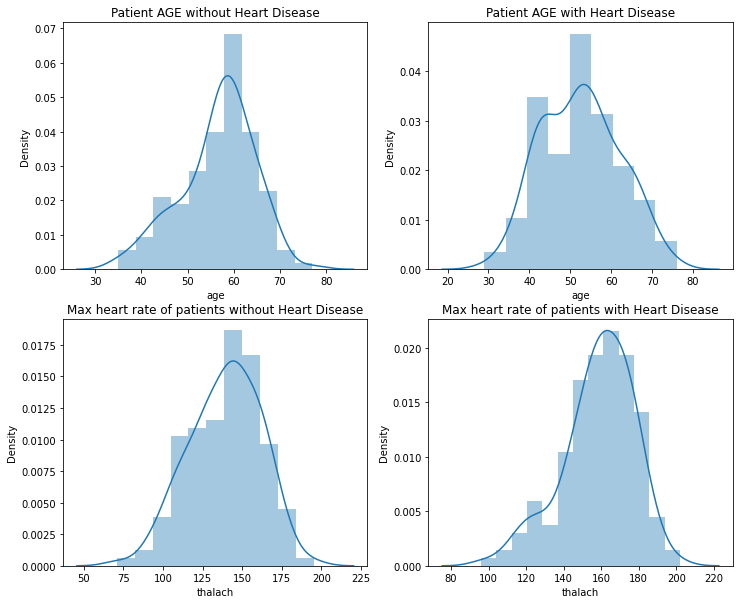

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Patient AGE without Heart Disease')

plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Patient AGE with Heart Disease')

plt.subplot(223)
sns.distplot(df[df['target']==0].thalach)
plt.title('Max heart rate of patients without Heart Disease')

plt.subplot(224)
sns.distplot(df[df['target']==1].thalach)
plt.title('Max heart rate of patients with Heart Disease')

# PREPROCESSING

In [ ]:
xs = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
         'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [ ]:
xs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
xs.shape

(303, 13)

In [ ]:
ys = df['target']

In [ ]:
ys

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Splitting the data into testing and training sets in such a way that 65% data is used to train the model and remaining 35% data is used to test the model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xs,ys,random_state=10, test_size=0.35, shuffle=True)

In [ ]:
x_train.shape

(196, 13)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [ ]:
x_test.shape

(107, 13)

In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1


In [ ]:
y_train.shape

(196,)

In [ ]:
y_train

196    0
157    1
212    0
68     1
276    0
      ..
156    1
123    1
15     1
125    1
265    0
Name: target, Length: 196, dtype: int64

In [ ]:
y_test.shape

(107,)

In [ ]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
167    0
100    1
111    1
170    0
142    1
Name: target, Length: 107, dtype: int64

*We can see that the data is split randomly*

## Decision Tree Model

In [ ]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier(random_state = 10, max_depth=4, min_samples_split=20)
dtree = dtree.fit(x_train, y_train)

In [ ]:
column_headers = x_train.columns.values

In [ ]:
column_headers

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

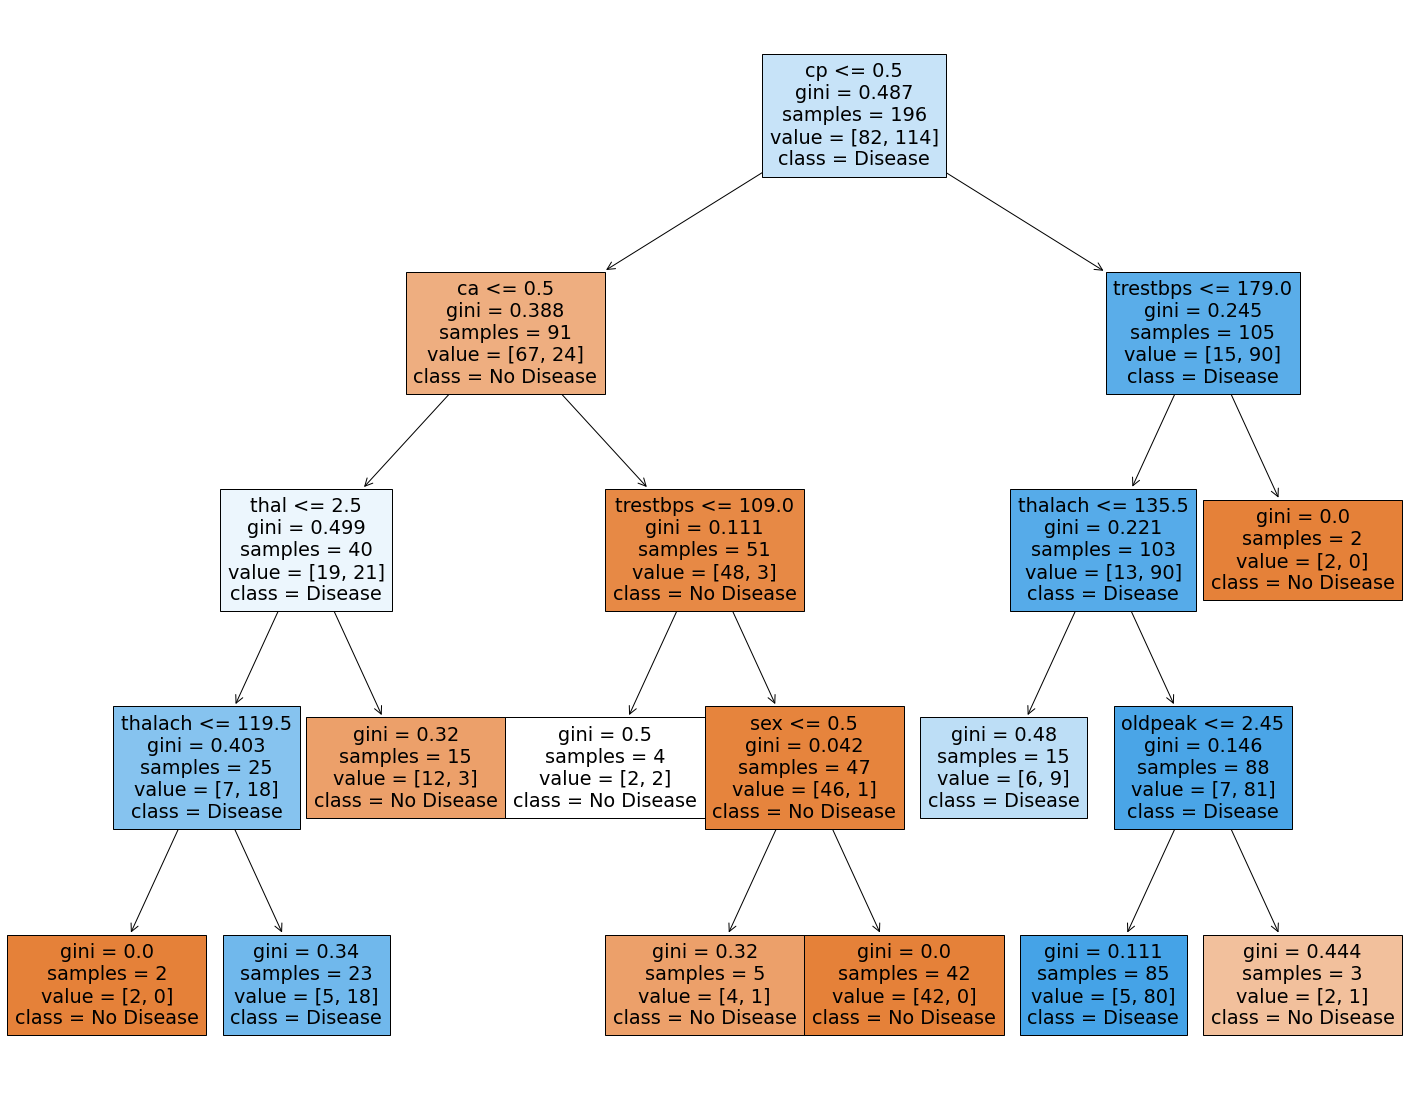

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree,
                   feature_names= column_headers,
                   class_names=['No Disease', "Disease"],
                   filled=True)

# Source of this code block : https://mljar.com/blog/visualize-decision-tree/

In [ ]:
prediction = dtree.predict(x_test)

In [ ]:
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
y_test_arr = y_test.to_numpy()

In [ ]:
y_test_arr

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
dtree_accuracy = accuracy_score(y_test_arr, prediction) * 100

In [ ]:
dtree_accuracy

79.43925233644859

In [ ]:
# this function is just used to visualize the importance of the features while predicting by using decision trees

def feature_importance(model):
  plt.figure(figsize=(8,6))
  n_features = 13
  plt.barh(range(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features), x_train)
  plt.xlabel("Feature Importance")
  plt.ylabel("Features")
  plt.ylim(-1, n_features)


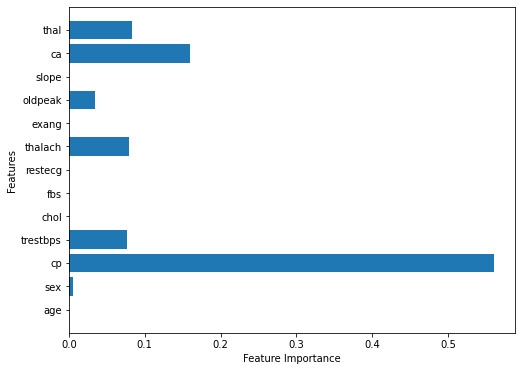

In [ ]:
feature_importance(dtree)

**Now, we do the whole process again by removing the 6 parameters which weren't used in decision making and then checking the accuracy again.**

In [ ]:
cols_to_drop = ['slope', 'fbs', 'exang', 'restecg', 'chol', 'age']

x_train = x_train.drop(cols_to_drop, axis=1)
x_test = x_test.drop(cols_to_drop, axis=1)

In [ ]:
x_train

,sex,cp,trestbps,thalach,oldpeak,ca,thal
196,1,2,150,147,3.6,0,2
157,1,1,122,174,0.0,0,2
212,1,0,118,140,1.2,0,3
68,1,1,120,170,0.0,0,2
276,1,0,146,105,2.0,1,3
...,...,...,...,...,...,...,...
156,1,2,130,179,0.0,0,2
123,0,2,108,167,0.0,0,2
15,0,2,120,158,1.6,0,2
125,0,1,118,192,0.7,0,2


In [ ]:
dtree2 = DecisionTreeClassifier(random_state = 10, max_depth=4, min_samples_split=20)
dtree2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=10)

In [ ]:
column_headers_2 = list(x_train.columns)

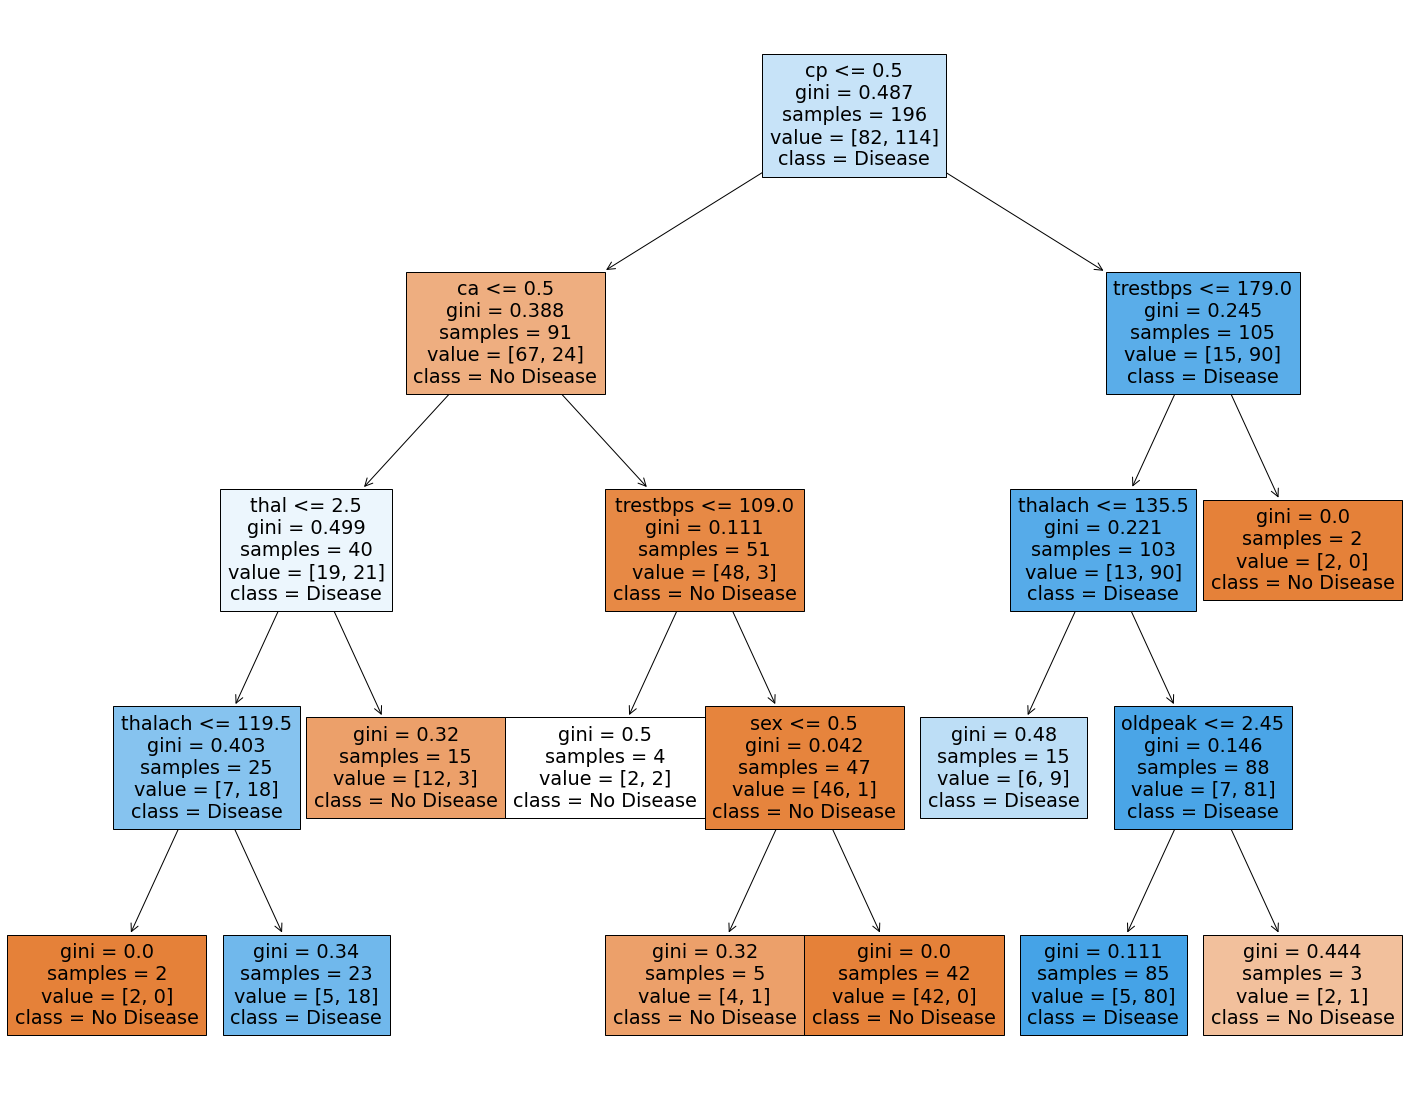

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree2,
                   feature_names= column_headers_2,
                   class_names=['No Disease', "Disease"],
                   filled=True)

In [ ]:
prediction2 = dtree2.predict(x_test)

In [ ]:
dtree_accuracy2 = accuracy_score(y_test_arr, prediction2) * 100

In [ ]:
dtree_accuracy2

79.43925233644859

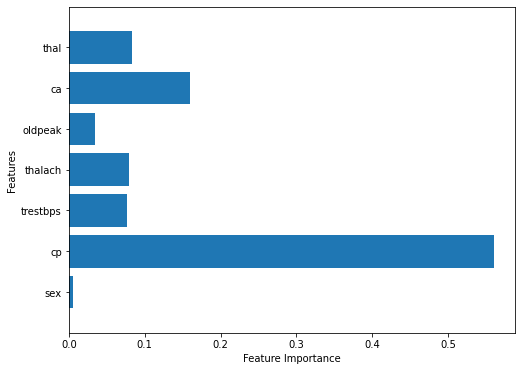

In [ ]:
def feature_importance2(model):
  plt.figure(figsize=(8,6))
  n_features = 7
  plt.barh(range(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features), x_train)
  plt.xlabel("Feature Importance")
  plt.ylabel("Features")
  plt.ylim(-1, n_features)

feature_importance2(dtree2)

In [ ]:
print("Accuracy with 13 paramaters: ", dtree_accuracy)
print("Accuracy with 7 paramaters: ", dtree_accuracy2)

Accuracy with 13 paramaters:  79.43925233644859
Accuracy with 7 paramaters:  79.43925233644859


So, the accuracy is same after dropping a total of 6 paramaters. Let us now try to adjust some other hyper parameters.

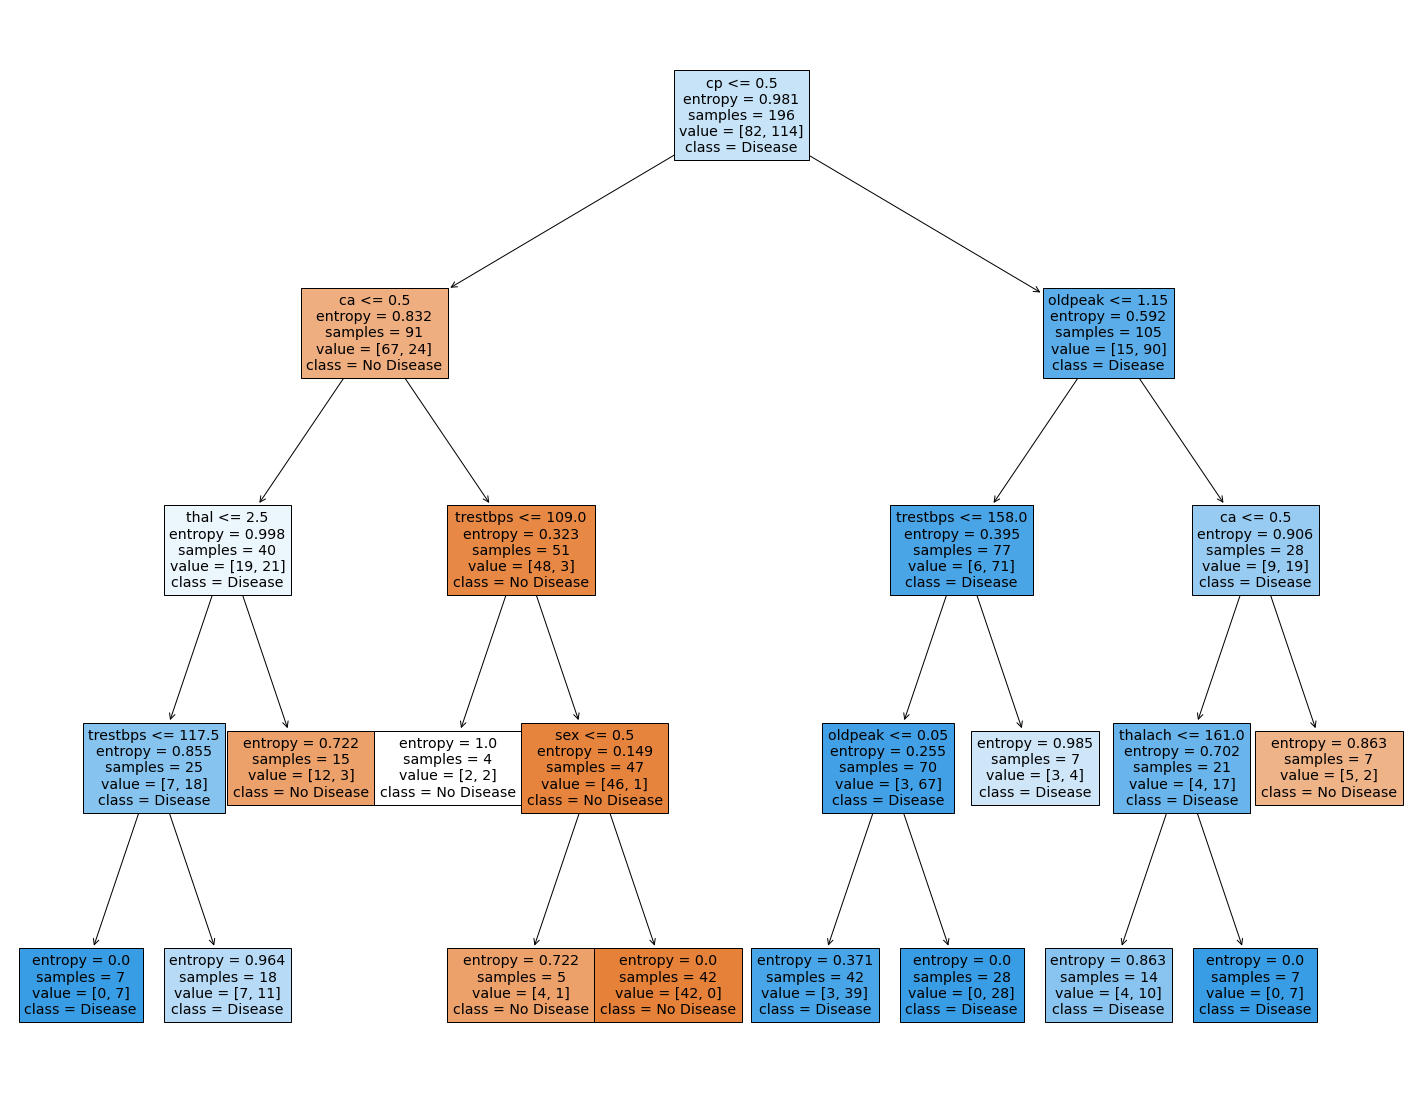

In [ ]:
dtree3 = DecisionTreeClassifier(random_state = 10, max_depth=4, min_samples_split=20, criterion='entropy')

dtree3.fit(x_train, y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree3,
                   feature_names= column_headers_2,
                   class_names=['No Disease', "Disease"],
                   filled=True)

In [ ]:
prediction3 = dtree3.predict(x_test)
dtree_accuracy3 = accuracy_score(y_test_arr, prediction3) * 100

In [ ]:
wrong_pred = (y_test_arr != prediction3).sum()
print('Total incorrect predictions: {:} out of {:}'.format(wrong_pred, len(y_test_arr)))
print('accuracy of dtree3: {:.3f}'.format(dtree_accuracy3))

Total incorrect predictions: 23 out of 107
accuracy of dtree3: 78.505


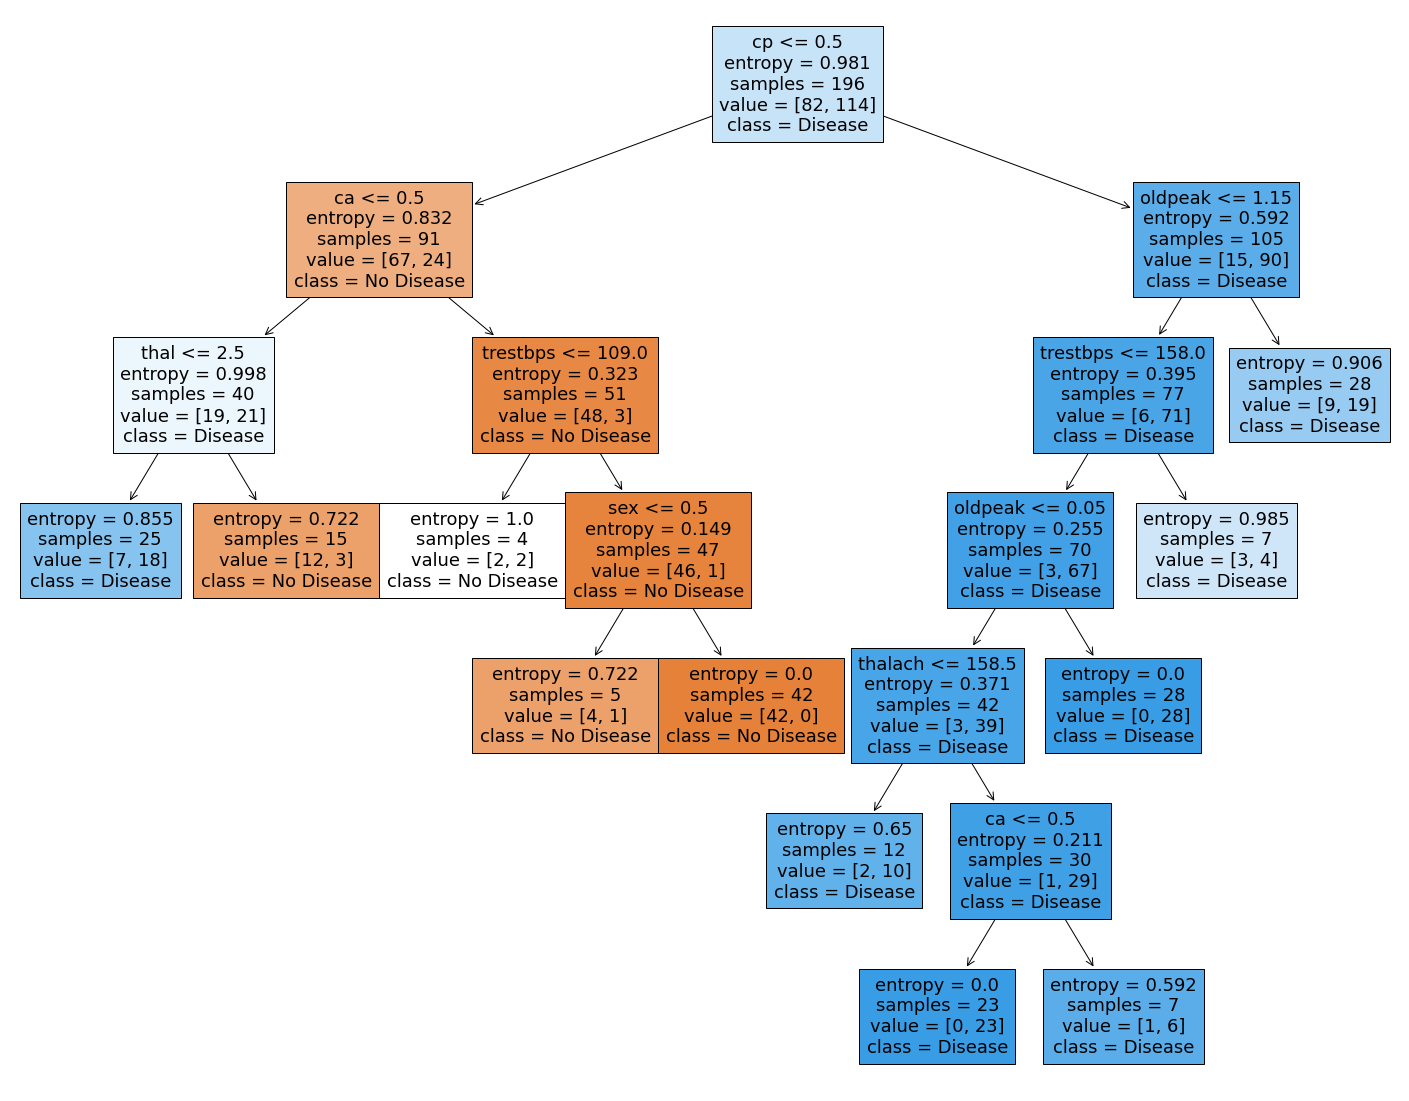

In [ ]:
dtree4 = DecisionTreeClassifier(random_state = 10, max_depth=10, min_samples_split=30, criterion='entropy')

dtree4.fit(x_train, y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree4,
                   feature_names= column_headers_2,
                   class_names=['No Disease', "Disease"],
                   filled=True)

In [ ]:
prediction4 = dtree4.predict(x_test)
dtree_accuracy4 = accuracy_score(y_test_arr, prediction4) * 100

In [ ]:
dtree_accuracy4

76.63551401869158

Let us SAVE the final model (dtree2) and try to use it again to predict heart disease.

In [ ]:
import pickle

In [ ]:
#Save an existing model to file using pickle to convert it into byte code
pickle.dump(dtree2, open("Final_Decision_Tree.pkl", "wb"))


In [ ]:
#Retreive an existing file to model using pickle to convert back from byte code
load_pickle = pickle.load(open("Final_Decision_Tree.pkl", "rb"))

In [ ]:
dtree2

DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=10)

In [ ]:
pickle_y_pred = load_pickle.predict(x_test)

In [ ]:
prediction2

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
pickle_y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
pickle_accuracy = accuracy_score(y_test_arr, pickle_y_pred)*100
pickle_accuracy

79.43925233644859

In [ ]:
dtree2

DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=10)

In [ ]:
load_pickle

DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=10)

In [ ]:
x_test

,sex,cp,trestbps,thalach,oldpeak,ca,thal
246,0,0,134,150,1.9,2,3
183,1,2,112,165,2.5,1,3
229,1,2,125,131,1.8,0,3
126,1,0,112,143,0.1,0,2
184,1,0,150,128,2.6,0,3
...,...,...,...,...,...,...,...
167,0,0,140,160,3.6,2,2
100,1,3,148,178,0.8,2,2
111,1,2,150,173,0.2,1,3
170,1,2,130,142,0.6,1,1


In [ ]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
167    0
100    1
111    1
170    0
142    1
Name: target, Length: 107, dtype: int64

In [ ]:
y_test_pickle = np.array([[0,0,134,150,1.9,2,3]]) 

In [ ]:
p = dtree2.predict(y_test_pickle)
p[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



0

In [ ]:
p = load_pickle.predict(y_test_pickle)
p[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



0

So, we have succesfully saved our model and loaded it back in and used it to get the same results.